In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('vectorized_data.zip')

In [31]:
df.head().T

,0,1,2,3,4
Polls ID,12522,12522,12522,12522,12522
Poll Responses Response,The strengths of Plato's approach is his const...,In the breakout we discussed if outside the ca...,Back to cmmon confusion time: the section 'und...,Most difficult weakness is that his position w...,I'm still trying to understand the significanc...
Assessment reports Hashtag,#objectivemorality,#objectivemorality,#objectivemorality,#objectivemorality,#objectivemorality
Assessment reports Score,2,3,2,2,2
time_stamp,1,1,1,1,1
tokenized_responses,"['The', 'strengths', 'of', ""Plato's"", 'approac...","['In', 'the', 'breakout', 'we', 'discussed', '...","['Back', 'to', 'cmmon', 'confusion', 'time', '...","['Most', 'difficult', 'weakness', 'is', 'that'...","[""I'm"", 'still', 'trying', 'to', 'understand',..."
stemmed_responses,"['the', 'strength', 'of', 'plato', 'approach',...","['in', 'the', 'breakout', 'we', 'discuss', 'if...","['back', 'to', 'cmmon', 'confus', 'time', 'the...","['most', 'difficult', 'weak', 'is', 'that', 'h...","[""i'm"", 'still', 'tri', 'to', 'understand', 't..."
clean_responses,"['strength', 'plato', 'approach', 'construct',...","['breakout', 'discuss', 'outsid', 'cave', 'big...","['back', 'cmmon', 'confus', 'time', 'section',...","['difficult', 'weak', 'posit', 'understand', '...","[""i'm"", 'still', 'tri', 'understand', 'signifi..."
string,strength plato approach construct whole framew...,breakout discuss outsid cave bigger cave thus ...,back cmmon confus time section understand inte...,difficult weak posit understand testabl like i...,i'm still tri understand signific cave analog ...
LOs/ HCs,objmorality,objmorality,objmorality,objmorality,objmorality


In [21]:
df.corr()['Assessment reports Score'].sort_values(ascending=False)

Assessment reports Score        1.000000
linsear_write_formula           0.221219
automated_readability_index     0.218330
flesch_kincaid_grade            0.218271
gunning_fog                     0.214931
words_count                     0.210449
unique_words                    0.200648
cttr                            0.154763
rttr                            0.154763
time_stamp                      0.068315
mtld                            0.064790
dale_chall_readability_score    0.063682
Polls ID                        0.062925
vec_16                          0.054454
hdd                             0.047001
vec_19                          0.041594
coleman_liau_index              0.033269
vec_7                           0.025506
vec_9                           0.014166
vec_14                          0.011754
vec_2                           0.007678
vec_18                          0.003094
vec_13                          0.002885
vec_4                          -0.000437
Summer          

In [22]:
import scipy.stats as sts
def correlation_comparison(dataset, y_column): 
    x= np.array(dataset['Assessment reports Score']) 
    y = np.array(dataset[y_column])


    code_coef = np.corrcoef(x, y)
    r_pear, p_pear = sts.pearsonr(x, y)
    r_spear, p_spear = sts.spearmanr(x, y)
    r_kend, p_kend = sts.kendalltau(x, y)

    r_z = np.arctanh(r_pear)

    print(f'Mean of score:{np.mean(y)} and std of score:{np.std(y)}')
    plt.title(f"Fluency score distribution for the {dataset.name} polls")
    sns.distplot(y)
    # plt.text(0.5, 0.5, 'matplotlib', ha='right', va='top')

    plt.annotate(f'Mean:{round(np.mean(y),2)}, std:{round(np.std(y),2)}', xy=(0.05, 0.95), xycoords='axes fraction')
    plt.show()

    print(f'The correlation between Assessment reports Score and {y_column}')
    print(f'Person r and p value:{r_pear, p_pear}')
    print(f'Spearman r and p value:{r_spear, p_spear}')
    print(f'Kendalltau r and p value:{r_kend, p_kend}')
    print(f'Fisher z-transformation value:{r_z}')
    
    sns.set_palette('rainbow')
    sns.boxplot(x=x, y=y)
    plt.xlabel('Grade')
    plt.ylabel('Fluency score')
    plt.title(f"Fluency score by grade in the {dataset.name} polls")
    plt.show()

    sns.violinplot(data=df, x=x, y = y,  scale='width')
    plt.xlabel('Grade')
    plt.ylabel('Fluency score')    
    plt.title(f"Fluency score by grade in the {dataset.name} polls")
    plt.show()

Mean of score:25.99397357798582 and std of score:7.398982698698068


/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_19449/3138397249.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


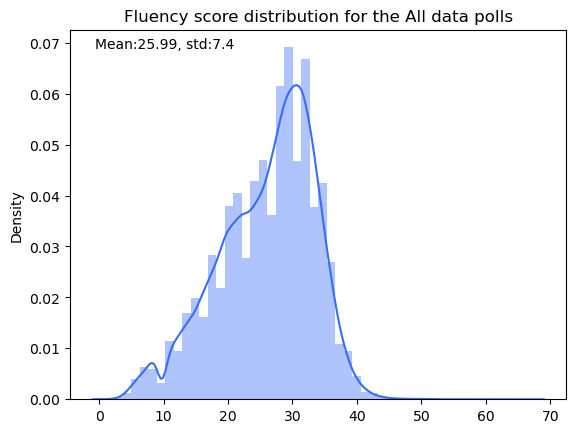

The correlation between Assessment reports Score and linsear_write_formula
Person r and p value:(0.22121909953955635, 0.0)
Spearman r and p value:(0.19855376949514122, 0.0)
Kendalltau r and p value:(0.15783904270400437, 0.0)
Fisher z-transformation value:0.2249375759183528


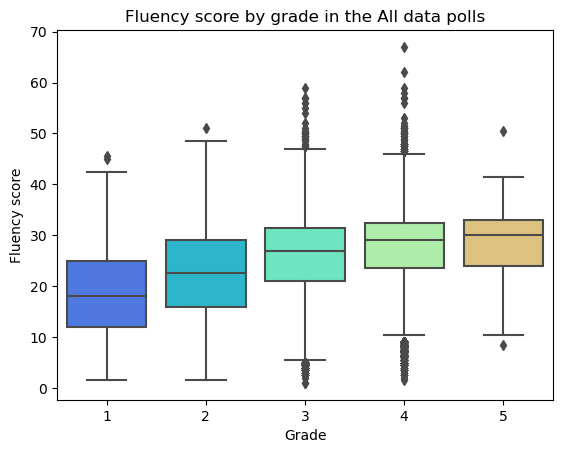

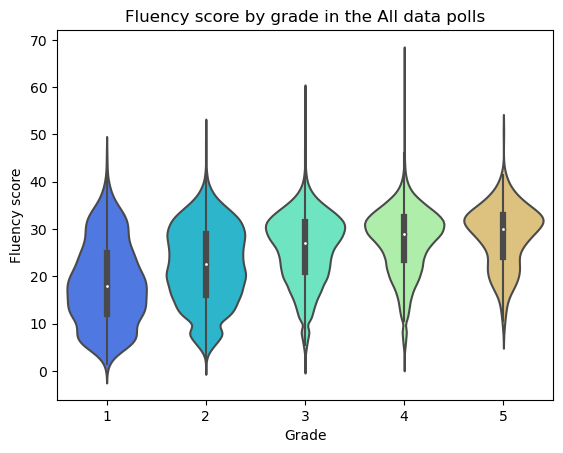

In [23]:
df.name = 'All data'
correlation_comparison(df, 'linsear_write_formula')

Mean of score:13.939157379599296 and std of score:1.6572919453248578


/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_19449/3138397249.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


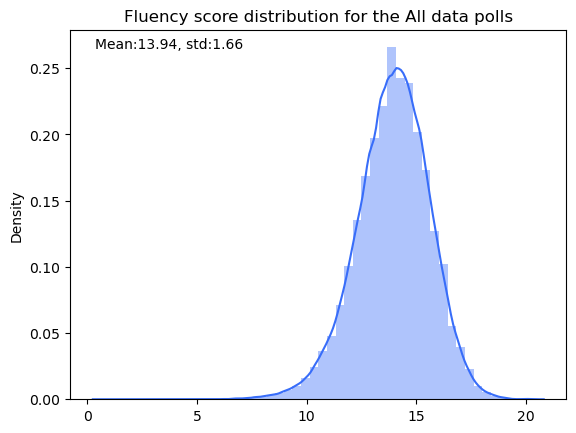

The correlation between Assessment reports Score and dale_chall_readability_score
Person r and p value:(0.06368216216397576, 1.1142930520779174e-157)
Spearman r and p value:(0.05765269317993621, 1.4976678806993733e-129)
Kendalltau r and p value:(0.04526240754798034, 4.5182926523778035e-130)
Fisher z-transformation value:0.06376845816549309


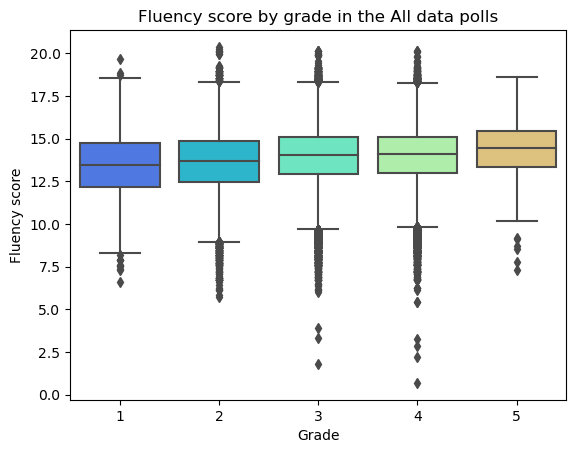

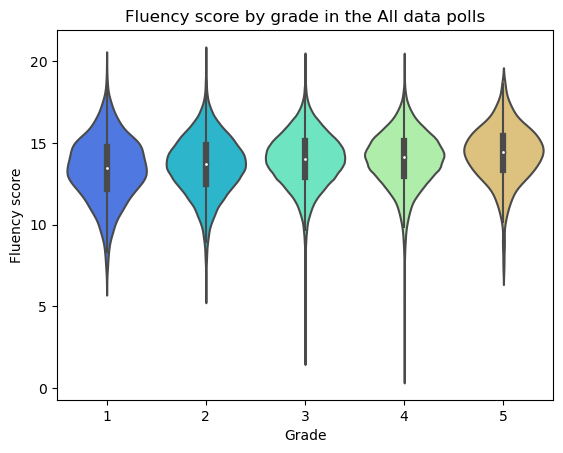

In [24]:
correlation_comparison(df, 'dale_chall_readability_score')

Mean of score:20.613989928523175 and std of score:4.780481831990909


/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_19449/3138397249.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


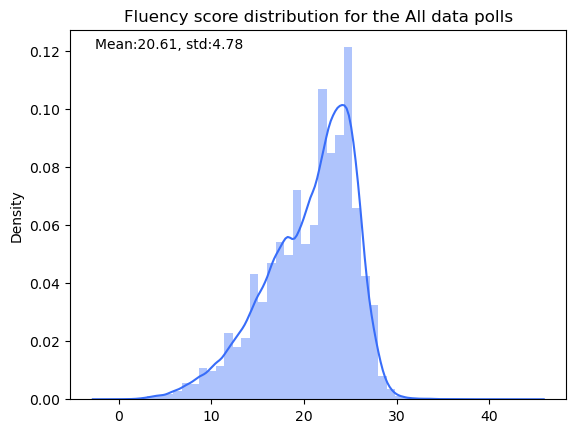

The correlation between Assessment reports Score and flesch_kincaid_grade
Person r and p value:(0.21827099399292468, 0.0)
Spearman r and p value:(0.19722132195571596, 0.0)
Kendalltau r and p value:(0.15694279110893275, 0.0)
Fisher z-transformation value:0.22183988681585506


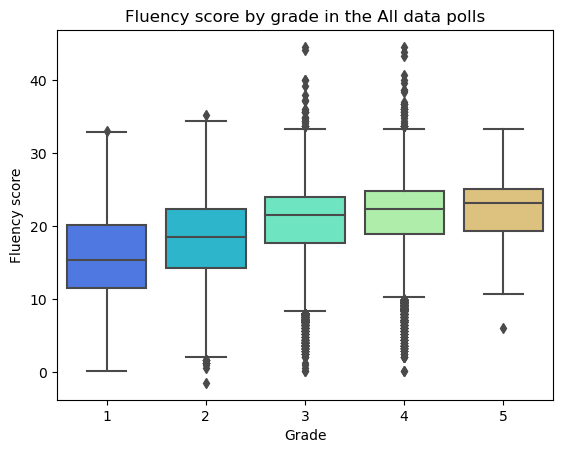

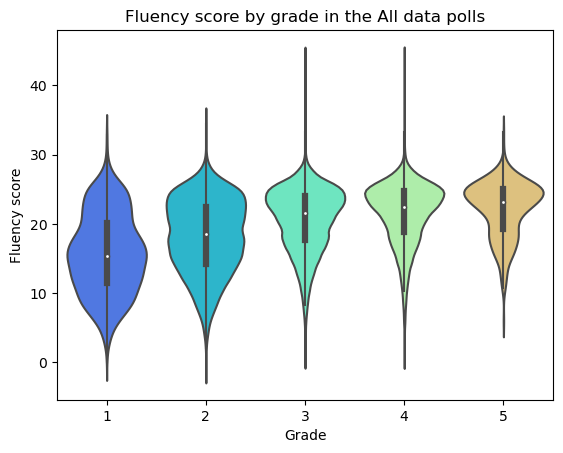

In [25]:
correlation_comparison(df, 'flesch_kincaid_grade')

Mean of score:80.46073883990667 and std of score:20.963888107967936


/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_19449/3138397249.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


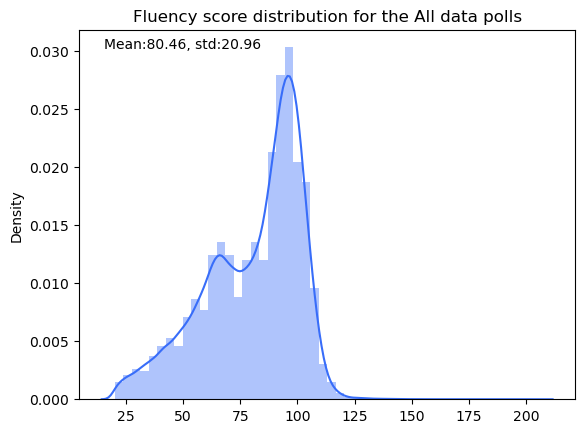

The correlation between Assessment reports Score and words_count
Person r and p value:(0.21044908044289617, 0.0)
Spearman r and p value:(0.17937260961754378, 0.0)
Kendalltau r and p value:(0.14190421586562074, 0.0)
Fisher z-transformation value:0.21364119151261468


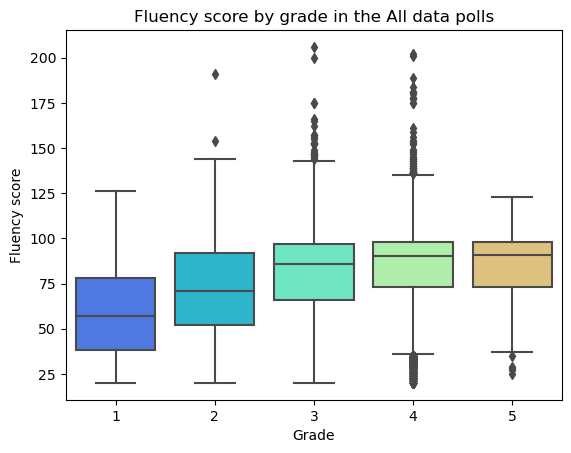

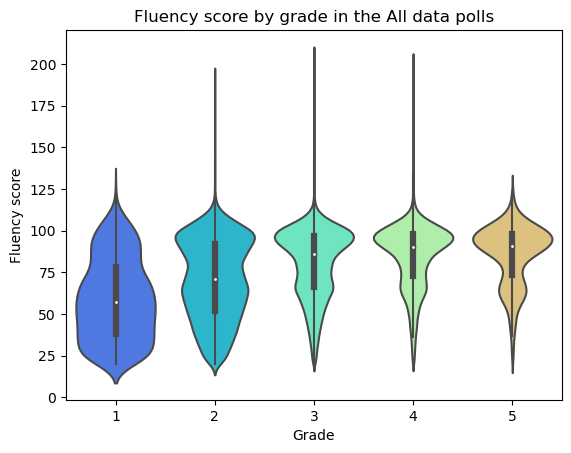

In [26]:
correlation_comparison(df, 'words_count')

Mean of score:54.274024786960446 and std of score:13.285699497921321


/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_19449/3138397249.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


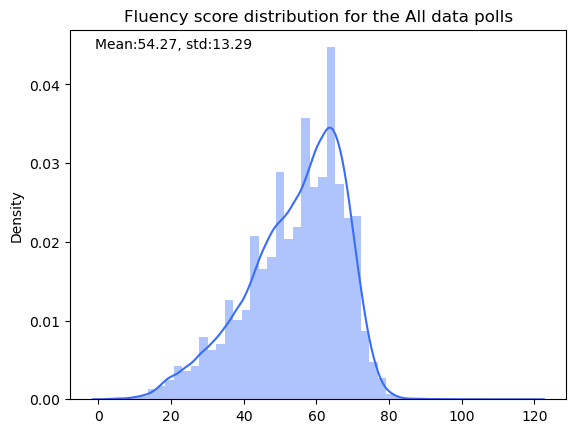

The correlation between Assessment reports Score and unique_words
Person r and p value:(0.20064812798147183, 0.0)
Spearman r and p value:(0.17881827837030984, 0.0)
Kendalltau r and p value:(0.14209693888110173, 0.0)
Fisher z-transformation value:0.2034077786440425


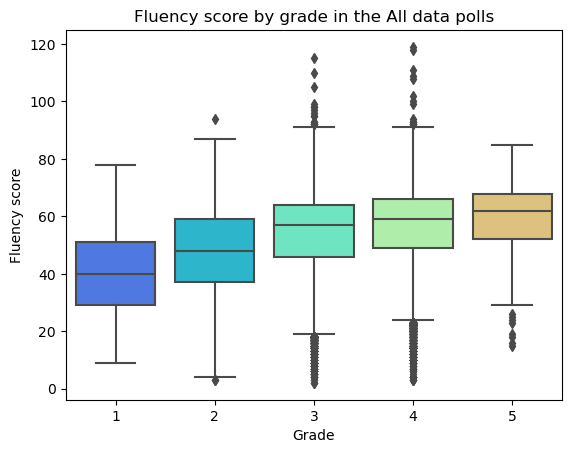

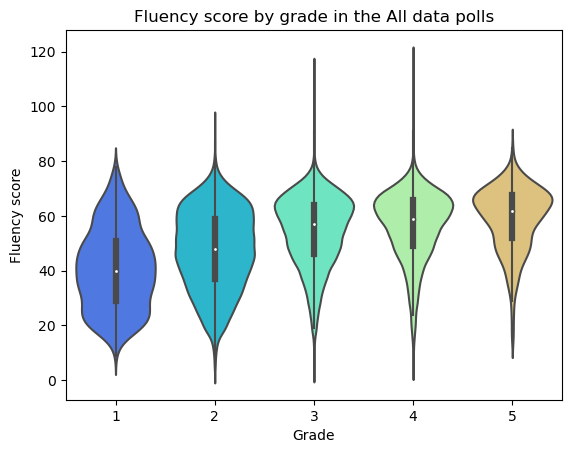

In [27]:
correlation_comparison(df, 'unique_words')

Mean of score:4.263404403164322 and std of score:0.6291098374877889


/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_19449/3138397249.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


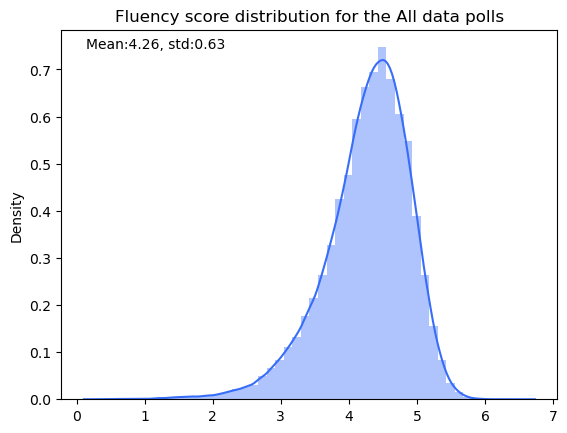

The correlation between Assessment reports Score and cttr
Person r and p value:(0.15476284823890515, 0.0)
Spearman r and p value:(0.14900358684514547, 0.0)
Kendalltau r and p value:(0.11740749775345924, 0.0)
Fisher z-transformation value:0.15601651736014807


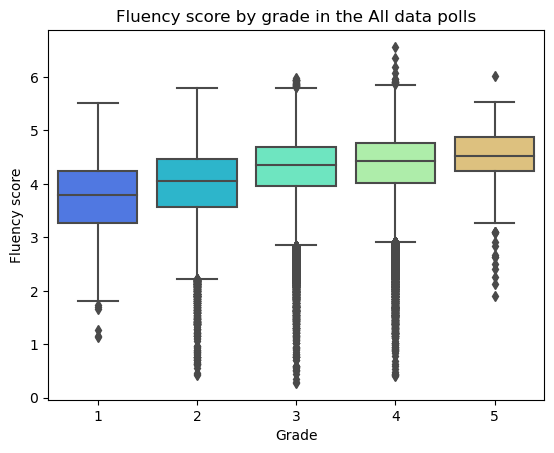

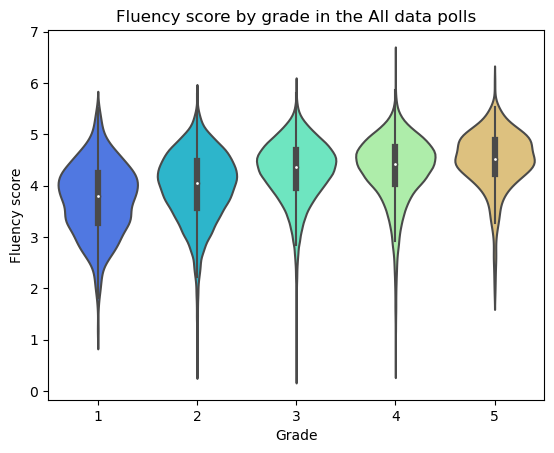

In [28]:
correlation_comparison(df, 'cttr')

Mean of score:6.029364328836155 and std of score:0.8896956643975649


/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_19449/3138397249.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


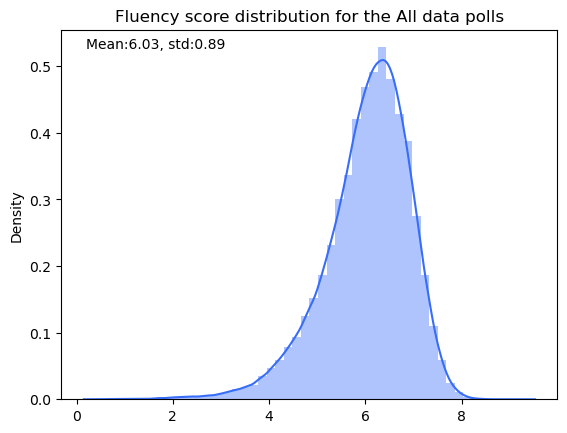

The correlation between Assessment reports Score and rttr
Person r and p value:(0.15476284823890518, 0.0)
Spearman r and p value:(0.1490046092117555, 0.0)
Kendalltau r and p value:(0.11740815682307904, 0.0)
Fisher z-transformation value:0.1560165173601481


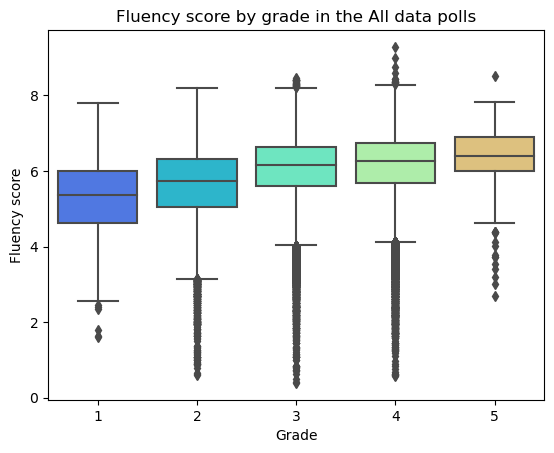

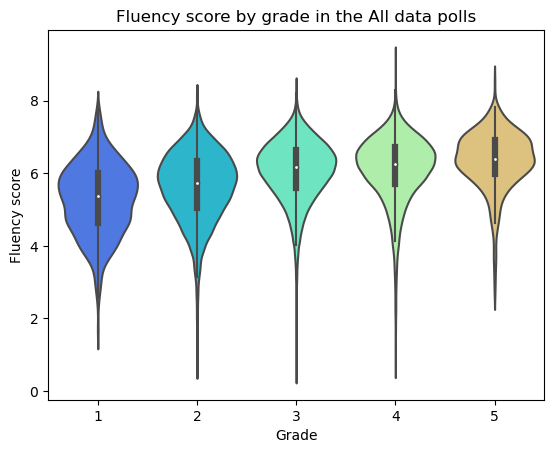

In [29]:
correlation_comparison(df, 'rttr')